#  Flipkart Reviews Sentiment Analysis using Python

This article is based on the analysis of the reviews and ratings user gives
on Flipkart to make others aware of their experience and moreover about
the quality of the product and brand. So, by analyzing that data we can
tell the users a lot about the products and also the ways to enhance the
quality of the product.

###  Importing libaries

The Libaries are:
* Pandas : For importing the dataset.
* Scikit-learn : For importing the model, accuracy module, and TfidfVectorizer.
* Warning : To ignore all the warnings
* Matplotlib : To plot the visualization. Also used Wordcloud for that.
* Seaborn : For data visualization.

In [1]:
# importing libaries
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [2]:
# importing nltk libaries 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# loading the dataset
data=pd.read_csv('C:/Users/USER/Desktop/rene/flipkart_data.csv')
data.head(10)

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5
5,Awsome sound powerful bass battery backup is a...,5
6,This product sound is clear and excellent bass...,4
7,Should u buy this---Pros:-1. Sound quality and...,4
8,"First of all, I want to talk about sound quali...",5
9,Good looking Super Fine clear Sound and power ...,5


### Preprocessing and cleaning the reviews

As, the real data is multi-labelled, so firstly explore those labels then we will convert them into 2 classes.

In [4]:
# finding unique elements of the column rating
pd.unique(data['rating'])

array([5, 4, 1, 3, 2], dtype=int64)

<Axes: xlabel='rating', ylabel='count'>

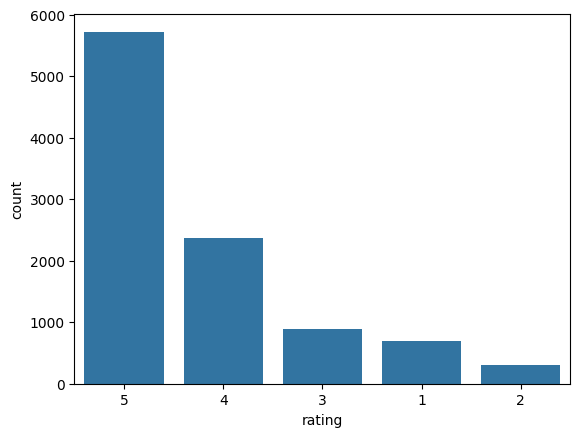

In [5]:
# counting values of data['rating']
sns.countplot(data=data,x='rating',order=data.rating.value_counts().index)

To predict the Sentiment as positive(numerical value = 1) or negative(numerical value = 0), we need to change the rating column into an another column of 0s and 1s category. For that the condition will be like if the rating is less than or equal to 4, then it is negative(0) else positive(1). For better understanding, refer the code below.

In [21]:
pos_neg=[]
for i in range(len(data['rating'])):
    if data['rating'][i]>=5:
        pos_neg.append(1)
    else:
        pos_neg.append(0)
data['label']=pos_neg
data['label'].head()

0    1
1    1
2    0
3    1
4    1
Name: label, dtype: int64

In [7]:
nltk.download('punkt')
from tqdm import tqdm

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
def preprocess_text(text_data):
    preprocessed_text=[]
    for sentence in tqdm(text_data):
     # Removing punctuations
        sentence=re.sub(r'[^\w\s]',' ',sentence)
     # Converting lowercase and removing stopwords
        preprocessed_text.append(' '.join(token.lower() for token in nltk.word_tokenize(sentence)
                                         if token.lower() not in stopwords.words('english')))
    return preprocessed_text

In [9]:
preprocessed_review=preprocess_text(data['review'].values)
data['review']=preprocessed_review

100%|█████████████████████████████████████████████████████████████████████████████| 9976/9976 [00:40<00:00, 245.35it/s]


In [10]:
data.head()

,review,rating,label
0,nice produt like design lot easy carry looked ...,5,1
1,awesome sound pretty see nd sound quality good...,5,1
2,awesome sound quality pros 7 8 hrs battery lif...,4,0
3,think good product per quality also design qui...,5,1
4,awesome bass sound quality good bettary long l...,5,1


### Analysis of the Dataset

Let’s check out that how many counts are there for positive and negative sentiments.

In [11]:
data['label'].value_counts()

label
1    5726
0    4250
Name: count, dtype: int64

### Word Cloud

To have the better picture of the importance of the words let’s create the Wordcloud of all the words with label = 1 i.e. positive

In [12]:
consolidated=' '.join(word for word in data['review'][data['label']==1].astype(str))
wordcloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)

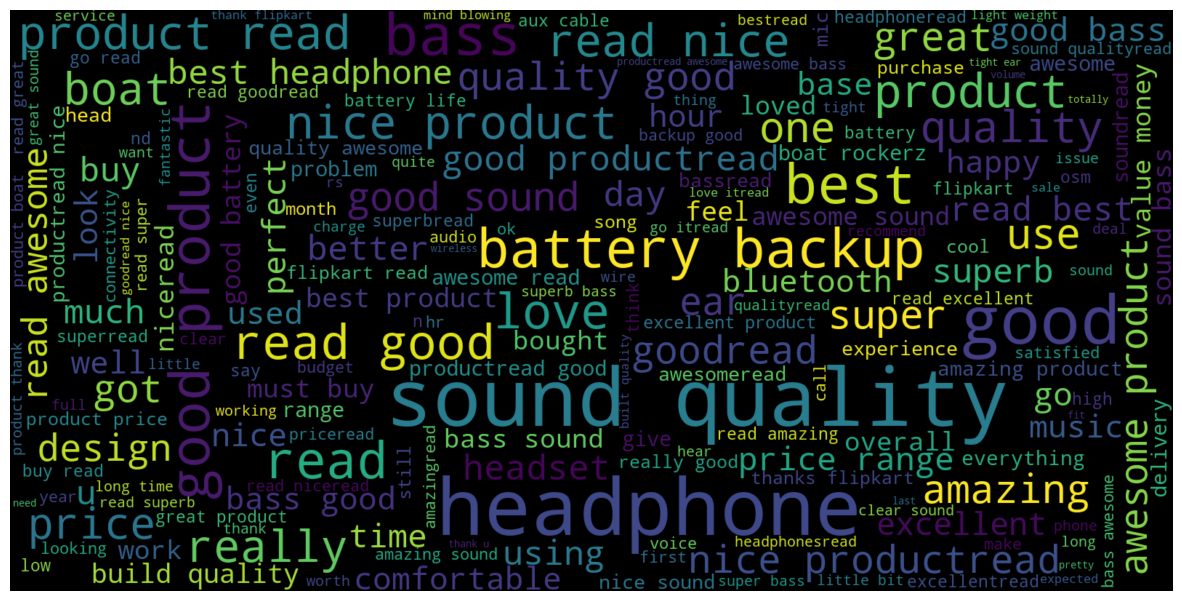

In [13]:
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()

### Converting text into Vectors

TF-IDF calculates that how relevant a word in a series or corpus is to a text. The meaning increases proportionally to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set). We will be implementing this with the code below.

In [14]:
cv=TfidfVectorizer(max_features=2500)
x=cv.fit_transform(data['review']).toarray()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Training and testing 

In [15]:
# splitting dataset for training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,data['label'],test_size=0.33,stratify=data['label'],random_state=42)

### Model training, Evaluation, and Prediction

Now we can train any model, Let’s explore the __Decision Tree__ for the prediction.

In [16]:
# importing the model DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [17]:
model=DecisionTreeClassifier(random_state=0)
# fitting the xtrain and ytrain into the model
model.fit(x_train,y_train)
# predicting the accuracy score of the model
pred=model.predict(x_train)
print(accuracy_score(y_train,pred))

0.9260811013018105


Let’s see the __confusion matrix__ for the results.

In [26]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

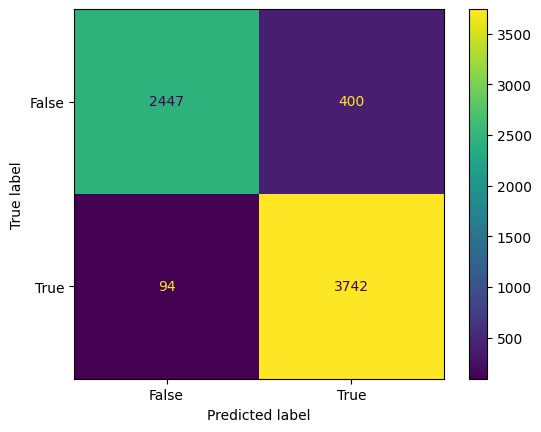

In [19]:
cm=confusion_matrix(y_train,pred)
cm_display=metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=[False,True])
cm_display.plot()
plt.show()

### Conclusion

Decision Tree Classifier is performing well with this data